## Gradient Boosting

Pokemon Dataset

Imports and reading in the data

In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

In [3]:
poke = pd.read_csv('../data/Pokemon.csv')

In [4]:
# poke.head(10)
poke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## Handling nulls

Filling null vairables in 'Type 2' with None

In [5]:
poke.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
poke['Type 2'].fillna(value='None', inplace=True)
poke.head(5)
poke.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

Dropping unecessary columns:
- Name
- Generation

In [7]:
poke1 = poke.drop(['#','Name', 'Generation'],axis=1)
poke1.columns

Index(['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Legendary'],
      dtype='object')

In [8]:
poke1['Type 2']= poke1['Type 2'] + '_2'



## Creating Dummies

Dummy variables for Type 1 and Type 2

In [9]:
poke2 = pd.get_dummies(poke1, columns=['Type 1','Type 2'], drop_first=True)
# type2_dummies = pd.get_dummies(poke1, columns=['Type 2'],drop_first=True)
poke2.head(5)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type 1_Dark,Type 1_Dragon,Type 1_Electric,Type 1_Fairy,Type 1_Fighting,Type 1_Fire,Type 1_Flying,Type 1_Ghost,Type 1_Grass,Type 1_Ground,Type 1_Ice,Type 1_Normal,Type 1_Poison,Type 1_Psychic,Type 1_Rock,Type 1_Steel,Type 1_Water,Type 2_Dark_2,Type 2_Dragon_2,Type 2_Electric_2,Type 2_Fairy_2,Type 2_Fighting_2,Type 2_Fire_2,Type 2_Flying_2,Type 2_Ghost_2,Type 2_Grass_2,Type 2_Ground_2,Type 2_Ice_2,Type 2_None_2,Type 2_Normal_2,Type 2_Poison_2,Type 2_Psychic_2,Type 2_Rock_2,Type 2_Steel_2,Type 2_Water_2
0,318,45,49,49,65,65,45,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,309,39,52,43,60,50,65,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
X = poke2.drop('Legendary', axis=1)
y = poke2['Legendary']

In [11]:
X.shape, y.shape
# y.head(5)

((800, 42), (800,))

Distribution of Legendary Pokemon in the dataset

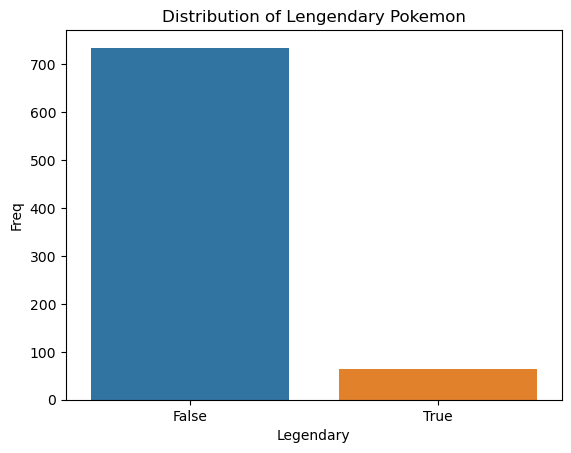

In [12]:
ax =sns.countplot(x='Legendary', data=poke2)
ax.set(title= 'Distribution of Lengendary Pokemon', xlabel='Legendary', ylabel='Freq');

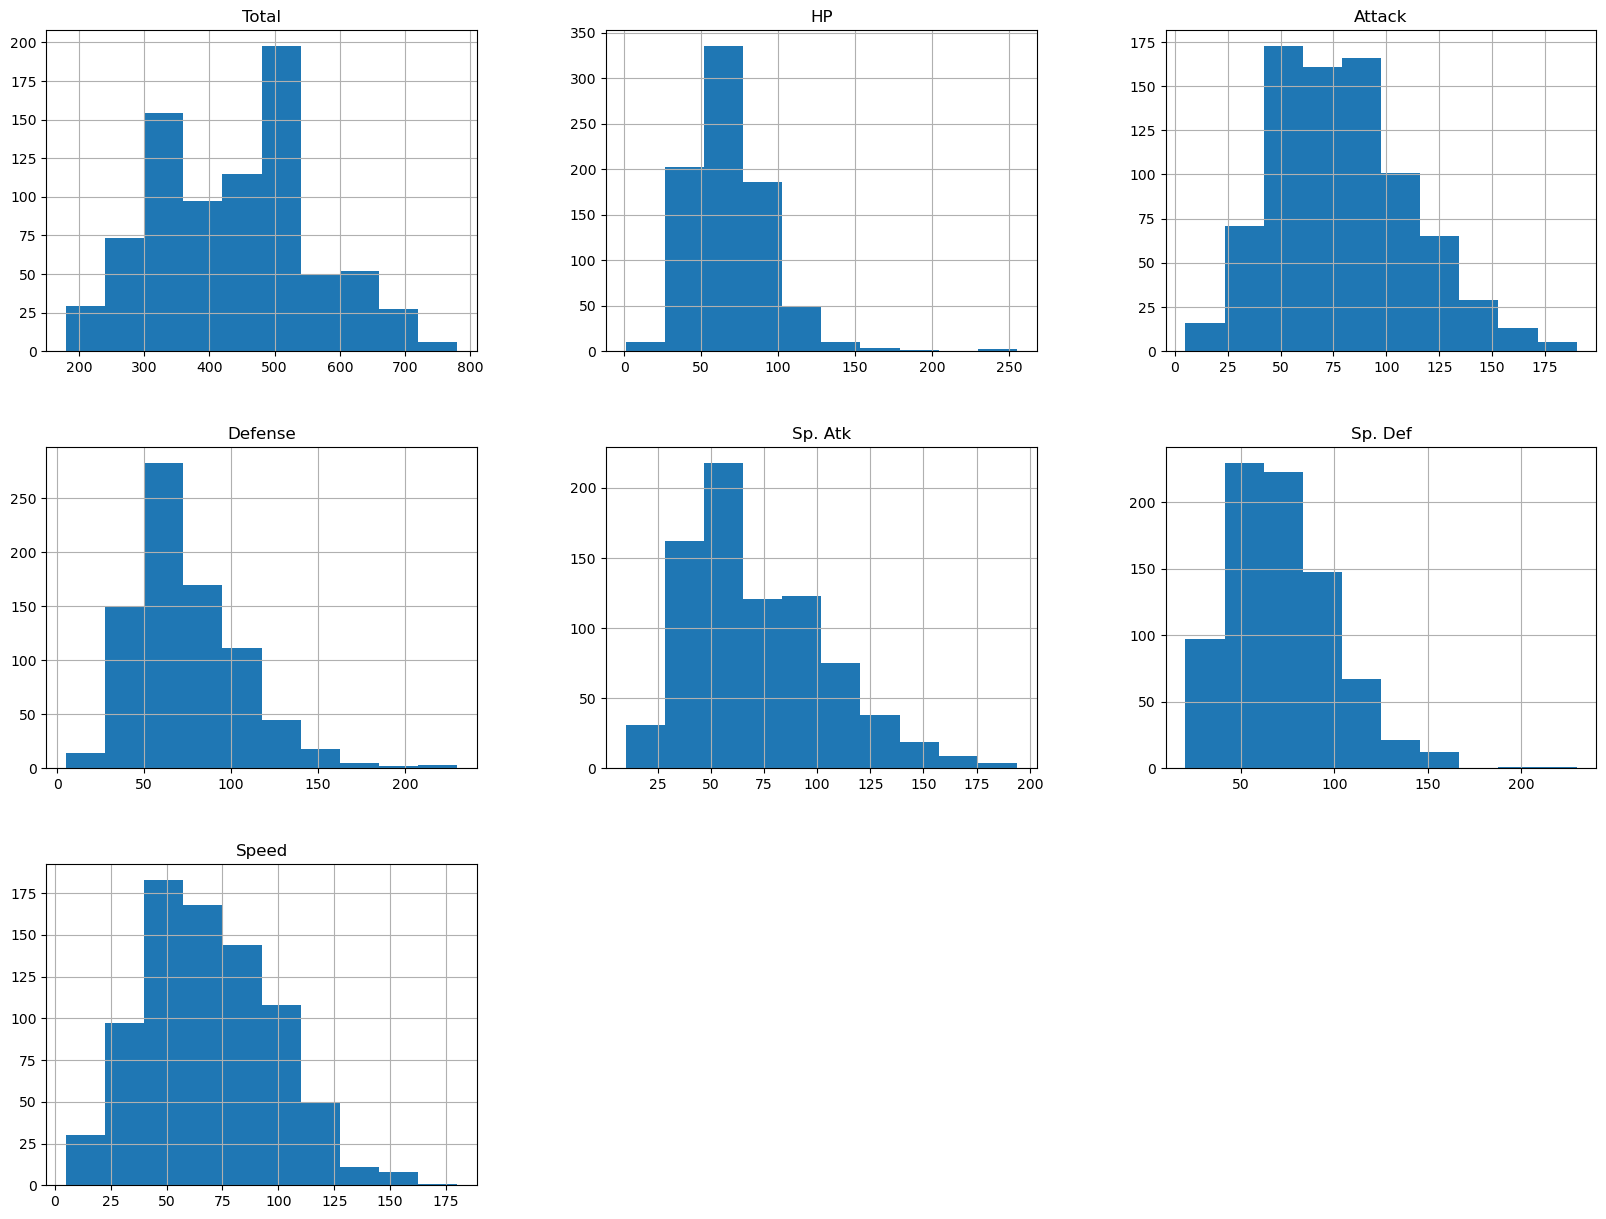

In [13]:
# Plotted Numeric columns
poke1.select_dtypes(include=np.number).hist(figsize=(20,15));

In [14]:
poke1.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


Distribution of the Total Stats by Main Type

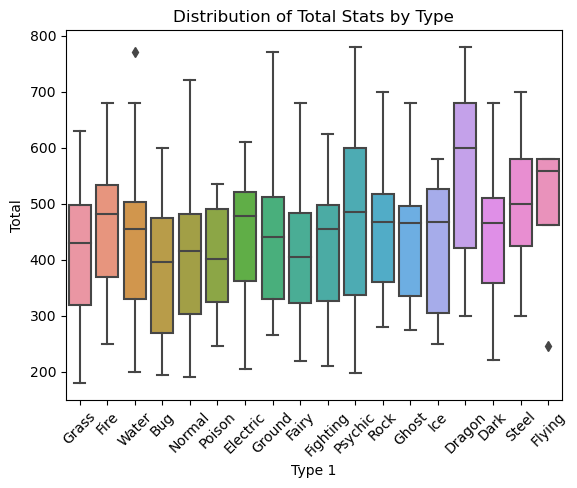

In [15]:
ax = sns.boxplot(data=poke1, x='Type 1', y='Total')
ax.set(title='Distribution of Total Stats by Type', xlabel='Type 1', ylabel='Total')
plt.xticks(rotation=45)
plt.show()



## Gradient Boosting Model

Splitting into training and testing data

In [16]:

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0)

In [17]:
X_train.shape, y_train.shape

((560, 42), (560,))

In [18]:
# Define the Gradient Boost Model

clf = GradientBoostingClassifier( n_estimators=100, learning_rate=.01, max_depth=4,random_state=0)

In [19]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, random_state=0)

In [20]:
clf.score(X_test,y_test)

0.9458333333333333

In [21]:
y_pred = clf.predict(X_test)


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9458333333333333


## Learning Curve

- Provides info how the model changes as the size of the training set increases
- Specifically, how the training and validation scores of a model change with resepct to the number of training samples used

In [23]:
train_sizes, train_scores, test_scores = learning_curve(clf, X,y, cv=10)


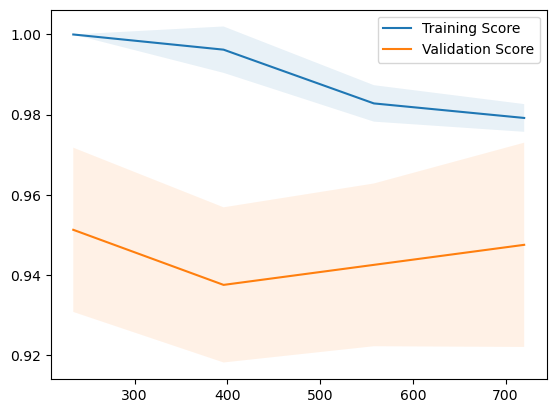

In [24]:
train_mean = np.mean(train_scores,axis =1)
train_std = np.std(train_scores, axis=1)
test_mean=np.mean(test_scores, axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes, train_mean,label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend()
plt.show()

## Confusion Matrix



In [25]:
cm = confusion_matrix(y_test,y_pred)

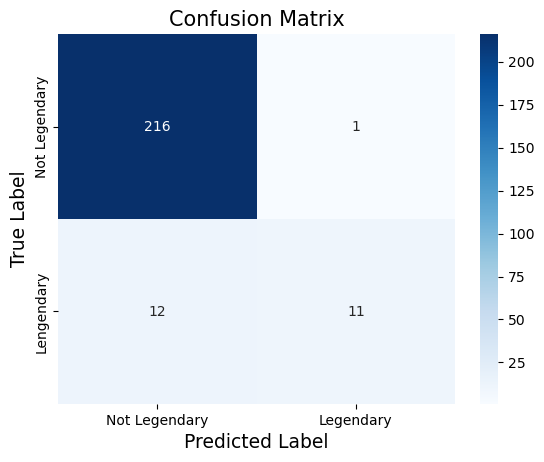

In [26]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Not Legendary', 'Legendary'],
            yticklabels=['Not Legendary', 'Lengendary'])
ax.set_xlabel('Predicted Label',  fontsize = 13.5)
ax.set_ylabel('True Label', fontsize = 13.5)
ax.set_title('Confusion Matrix' ,fontsize =15)
plt.show()

## ROC Curve

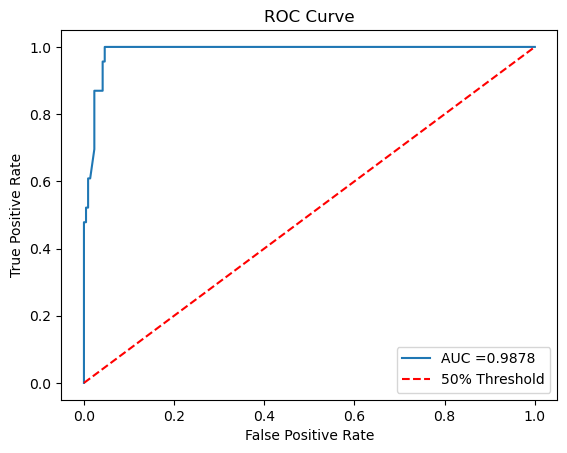

In [27]:
fig, ax = plt.subplots()
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
ax.plot(fpr,tpr, label=(f'AUC ={round(auc,4)}'))
ax.plot([0,1],[0,1], c='red', linestyle='dashed',label='50% Threshold')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve', )

plt.show()

## Feature Importance

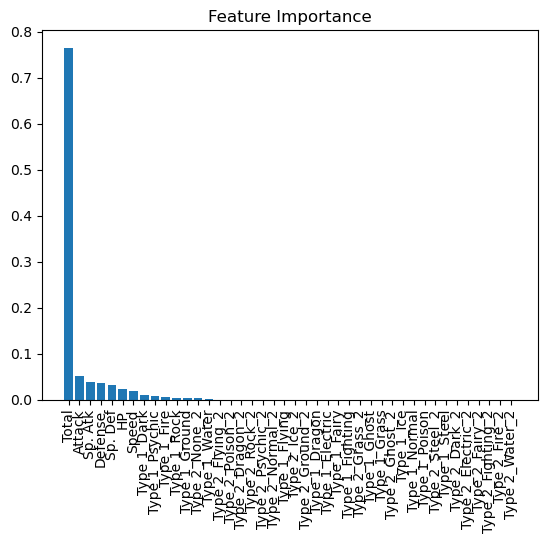

In [28]:
importance = clf.feature_importances_
features = X.columns

indices = np.argsort(importance)[::-1]

names = [features[i] for i in indices]

plt.figure()

plt.title('Feature Importance')

plt.bar(range(X.shape[1]), importance[indices])

plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

Training a second gradient model without the categorical data

In [29]:
poke1.head(5)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Grass,Poison_2,318,45,49,49,65,65,45,False
1,Grass,Poison_2,405,60,62,63,80,80,60,False
2,Grass,Poison_2,525,80,82,83,100,100,80,False
3,Grass,Poison_2,625,80,100,123,122,120,80,False
4,Fire,None_2,309,39,52,43,60,50,65,False


In [30]:
poke3 = poke1.drop(['Type 1', 'Type 2'], axis=1)
poke3.head(5)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,318,45,49,49,65,65,45,False
1,405,60,62,63,80,80,60,False
2,525,80,82,83,100,100,80,False
3,625,80,100,123,122,120,80,False
4,309,39,52,43,60,50,65,False


In [31]:
X1 = poke3.drop(['Legendary'], axis=1)
y1 = poke3['Legendary']

In [32]:
X1_train,X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=.3, random_state=0)

In [33]:
X1_train.shape, y1_train.shape

((560, 7), (560,))

Training a second model

In [34]:
clf2 = GradientBoostingClassifier( n_estimators=100, learning_rate=.01, max_depth=4,random_state=0)

In [35]:
clf2.fit(X1_train,y1_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, random_state=0)

In [36]:
clf2.score(X1_test,y1_test)

0.9541666666666667

In [37]:
y1_pred = clf2.predict(X1_test)

In [38]:
accuracy1 = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy1}')

Accuracy: 0.9541666666666667


## Confusion Matrix

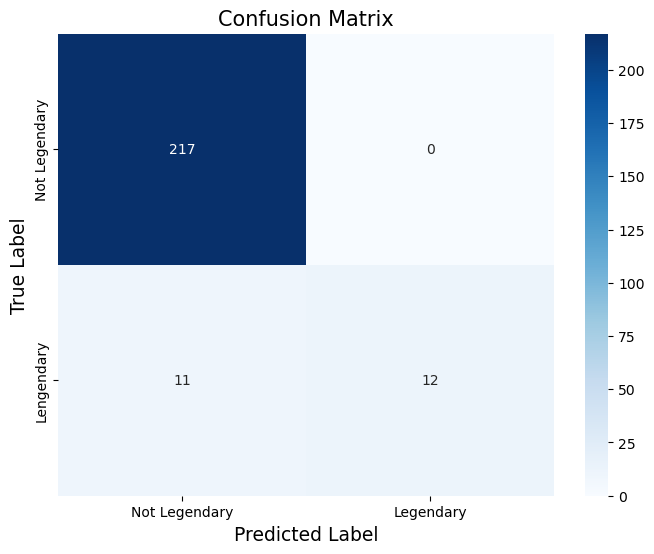

In [39]:

cm1 = confusion_matrix(y1_test,y1_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Not Legendary', 'Legendary'],
            yticklabels=['Not Legendary', 'Lengendary'])
ax.set_xlabel('Predicted Label',  fontsize = 13.5)
ax.set_ylabel('True Label', fontsize = 13.5)
ax.set_title('Confusion Matrix' ,fontsize =15)
plt.savefig('../images/cm_pokemon',bbox_inches='tight', transparent=True, facecolor ='#dcae52')
plt.show()

# ROC Curve


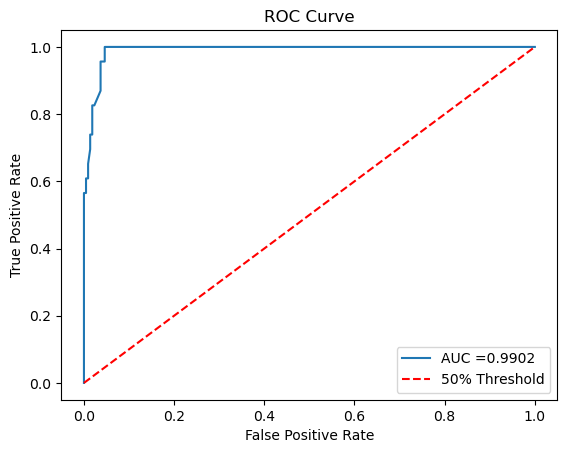

In [40]:

fig, ax = plt.subplots()
y_pred_proba = clf2.predict_proba(X1_test)[::,1]
fpr, tpr, _ = roc_curve(y1_test,y_pred_proba)
auc = roc_auc_score(y1_test,y_pred_proba)
ax.plot(fpr,tpr, label=(f'AUC ={round(auc,4)}'))
ax.plot([0,1],[0,1], c='red', linestyle='dashed',label='50% Threshold')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve', )

plt.show()



# Feature Importance

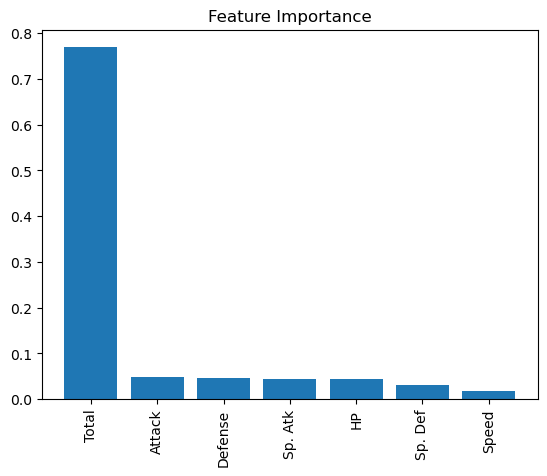

In [41]:
importance = clf2.feature_importances_
features = X1.columns

indices = np.argsort(importance)[::-1]

names = [features[i] for i in indices]

plt.figure()

plt.title('Feature Importance')

plt.bar(range(X1.shape[1]), importance[indices])

plt.xticks(range(X1.shape[1]), names, rotation=90)
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dclf = DecisionTreeClassifier(splitter='best', random_state=42)

dclf.fit(X_train,y_train)

dclf.score(X_test,y_test)

y_pred_d = dclf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_d)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9416666666666667


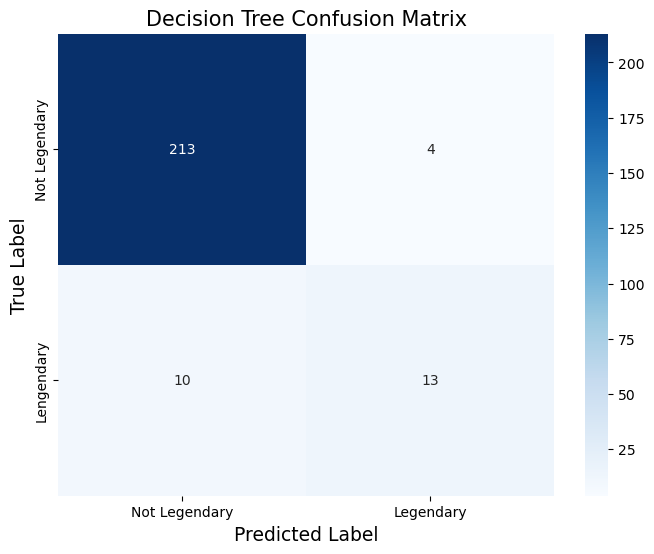

In [52]:
cmd = confusion_matrix(y_test,y_pred_d)

fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(cmd, annot=True, fmt='d', cmap='Blues', ax=ax,

 xticklabels=['Not Legendary', 'Legendary'],

yticklabels=['Not Legendary', 'Lengendary'])

ax.set_xlabel('Predicted Label')

ax.set_ylabel('True Label')

ax.set_title('Decision Tree Confusion Matrix')
ax.set_xlabel('Predicted Label',  fontsize = 13.5)
ax.set_ylabel('True Label', fontsize = 13.5)
ax.set_title('Decision Tree Confusion Matrix' ,fontsize =15)
plt.savefig('../images/cm_pokemon-_dt',bbox_inches='tight', transparent=True, facecolor ='#dcae52')

plt.show()

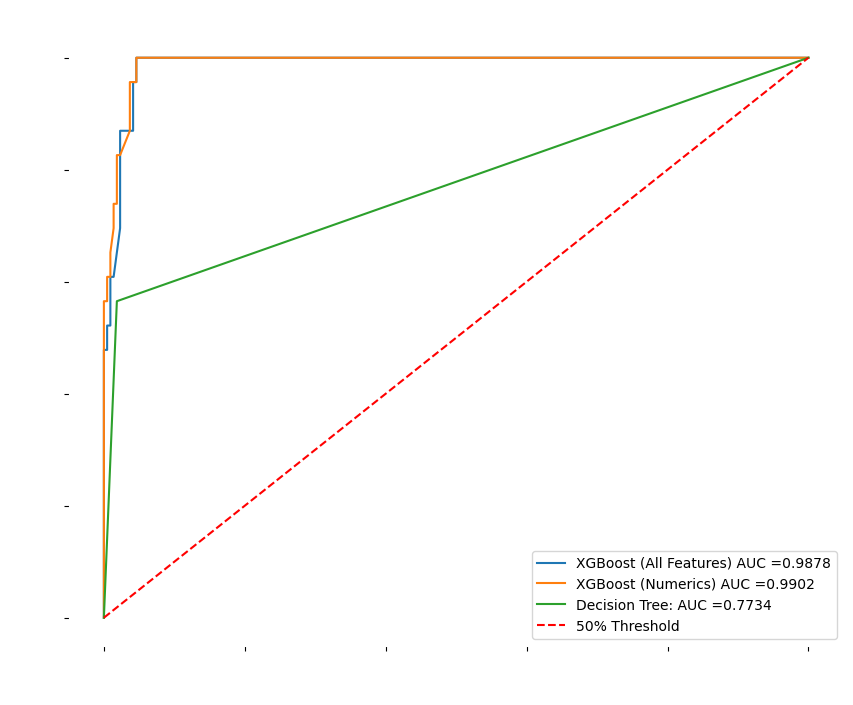

In [50]:


fig, ax = plt.subplots(figsize=(10,8))




y_pred_proba = clf.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,y_pred_proba)

auc = roc_auc_score(y_test,y_pred_proba)

ax.plot(fpr,tpr, label=(f'XGBoost (All Features) AUC ={round(auc,4)}'))




y_pred_proba = clf2.predict_proba(X1_test)[::,1]

fpr, tpr, _ = roc_curve(y1_test,y_pred_proba)

auc = roc_auc_score(y1_test,y_pred_proba)

ax.plot(fpr,tpr, label=(f'XGBoost (Numerics) AUC ={round(auc,4)}'))




y_pred_proba_d = dclf.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,y_pred_proba_d)

auc = roc_auc_score(y_test,y_pred_proba_d)

ax.plot(fpr,tpr, label=(f'Decision Tree: AUC ={round(auc,4)}'))

ax.plot([0,1],[0,1], c='red', linestyle='dashed',label='50% Threshold')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')

plt.ylabel('True Positive Rate', color ='white', fontsize= 13.5)

plt.xlabel('False Positive Rate', color ='white', fontsize= 13.5)

plt.legend(loc='lower right')
plt.yticks(fontsize=11,color ='white')
plt.xticks(fontsize=11,color ='white')
plt.title('ROC Curve',color='white' )
plt.savefig('../images/pokemon_roc',bbox_inches='tight',transparent=True)



plt.show()

